# Prediksi Kerusakan Mesin *Milling* dengan *Random Forest Classifier*, *Multi Layer Perceptron Classifier*, dan *XGBoost Classifier*

Mesin milling (disebut juga mesin frais) adalah mesin perkakas yang digunakan untuk membentuk benda kerja dengan menggunakan alat potong yang berputar. Proses ini menghasilkan permukaan datar atau bentuk yang presisi pada benda kerja.

Beberapa faktor yang berkontribusi kepada kerusakan mesin milling ini termasuk suhu, torsi, kecepatan rotasi alat potong, usia pemakaian alat, hingga kualitas alat potong. Dalam proyek ini, akan digunakan tiga algoritma untuk memprediksi kerusakan mesin milling, dengan mempertimbangkan faktor paling relevan dari berbagai faktor yang sudah disebutkan di atas.

## Import Library

Tahap ini merupakan tahap memasukkan Library yang digunakan dalam pengerjaan proyek, adapun library yang digunakan adalah :

1. **Numpy** - Library untuk operasi matematika pada array dan matriks multidimensi
2. **Pandas** - Menyediakan struktur data dan alat analisis data yang mudah digunakan, terutama untuk bekerja dengan dataframe
3. **Matplotlib** - Library untuk visualisasi data dalam bentuk grafik, plot, histogram, dll
4. **Seaborn** - Memperindah plot matplotlib dengan antarmuka
5. **Kagglehub** - Mengambil data dari Kaggle
6. **Label Encoder** - Untuk mengubah label kategorikal menjadi bentuk yang dapat diolah oleh algoritma
7. **StandardScaler** - Metode untuk menskalakan fitur sehingga memiliki rata-rata nol dan varians satu, membantu algoritma Machine Learning menangani data dengan efisien.
8. **TrainTestSplit** - Memisahkan data menjadi data latih dan data uji
9. **RandomForestClassifier** - Algoritma ensemble untuk klasifikasi yang menggunakan kombinasi dari pohon keputusan.
10. **XGBoostClassifier** - Algoritma untuk klasifikasi berbasis peningkatan gradien ekstrim
11. **accuracy_score** - Metrik untuk mengukur akurasi klasifikasi.
12. **confusion_matrix** - Metrik untuk memvisualisasikan performa klasifikasi

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from kagglehub import KaggleDatasetAdapter

from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, confusion_matrix

## Data Loading

Tahap ini adalah memasukkan dataset ke dalam proyek. Dataset yang digunakan adalah Predictive Maintenance Dataset (AI4I 2020) oleh Stephan Matzka yang diambil dari Kaggle pada link [berikut](https://www.kaggle.com/datasets/stephanmatzka/predictive-maintenance-dataset-ai4i-2020)

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"satriaadifirmansyah","key":"006dbae515ec28c175ef6ddd5a715a10"}'}

In [5]:
!pip install kaggle

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d stephanmatzka/predictive-maintenance-dataset-ai4i-2020

Dataset URL: https://www.kaggle.com/datasets/stephanmatzka/predictive-maintenance-dataset-ai4i-2020
License(s): CC-BY-NC-SA-4.0
  0% 0.00/136k [00:00<?, ?B/s]
100% 136k/136k [00:00<00:00, 366MB/s]


In [7]:
!unzip /content/predictive-maintenance-dataset-ai4i-2020.zip

Archive:  /content/predictive-maintenance-dataset-ai4i-2020.zip
  inflating: ai4i2020.csv            


Setelah dataset diunduh, kita *preview* isi dari dataset ini

In [8]:
df = pd.read_csv('/content/ai4i2020.csv')
df.head(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,0,0,0,0,0
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,0,0,0,0,0
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,0,0,0,0,0
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,0,0,0,0,0
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,0,0,0,0,0


## Data Analysis

Tahap pertama dalam analisis dataset ini adalah dengan mengetahui jumlah dan tipe data dari seluruh data yang ada dalam dataset ini

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

Sesuai dengan informasi dataset yang didapatkan dalam sumber data, Dataset terkait memiliki 10000 data dengan 14 fitur, yang mana 8 fitur akan diseleksi dalam proses analisis data selanjutnya untuk digunakan dalam algoritma prediksi, dan 6 fitur target yaitu Machine failure, TWF, HDF, PWF, OSF, dan RNF. Berikut adalah daftar variabel beserta penjelasannya:

1. UID: nomor identifikasi unik 1 to 10000
2. product ID: terdiri atas huruf L, M, or H untuk low (50% keseluruhan produk), medium (30%) and high (20%) sebagai variasi kualitas produk dan nomor serial spesifik terhadap varian itu.
3. type: Tipe kualitas produk sesuai kolom 2
4. air temperature [K]: Suhu udara ternormalisasi ke sekitar 300 K dengan deviasi skeitar 2 K
5. process temperature [K]: Suhu proses ternormalisasi ke penambahan sekitar 10 K dari suhu udara dengan deviasi sekitar 1 K.
6. rotational speed [rpm]: kecepatan rotasi dari alat potong, dikalkulasi dari daya sekitar 2860 W
7. torque [Nm]: torsi dari alat potong, terdirtribusi normal sekitar 40 Nm dengan deviasi sekitar 10 Nm
8. tool wear [min]: Menit penggunaan alat, dengan penambahan 5/3/2 menit sesuai dengan kualitas alat L/M/H
9. 'machine failure': label yang menunjukkan terjadinya kerusakan alat potong dalam bentuk apapun sesuai pada di penjelasan berikutnya.

Serta detail lebih lanjut mengenai tipe kerusakan yang tercakup pada dataset ini yaitu:
1. tool wear failure (TWF): kerusakan akibat usia pemakaian alat, setelah sekitar 200-240 menit
2. heat dissipation failure (HDF): kerusakan ketika perbedaan antara suhu udara dengan proses di bawah 8.6 K dan kecepatan rotasi alat di bawah 1380 rpm.
3. power failure (PWF): kerusakan akibat kesamaan antara daya yang dibutuhkan untuk proses dengan torsi dan kecepatan rotasi. Jika daya ini di bawah 3500 W dan di atas 9000 W
4. overstrain failure (OSF): kerusakan akibat usia pemakaian  dan torsi, yang melebihi 11000 Nm untuk tipe L, 12000 Nm untuk tipe M, dan 13000 untuk tipe H.
5. random failures (RNF): kerusakan yang terjadi diluar parameter kerusakan apapun, dengan potensi kerusakan seperti ini untuk semua alat hanya sebesar 0.1%.

Tahap kedua adalah dengan melihat informasi statistikal dari dataset.

In [10]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


Tahap ketiga adalah untuk memeriksa apakah ada deretan data yang kosong pada kolom tertentu

In [11]:
df.isna().sum()

,0
UDI,0
Product ID,0
Type,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],0
Machine failure,0
TWF,0


Tahap keempat adalah memeriksa apakah ada data yang terduplikasi

In [12]:
df.duplicated().sum()

np.int64(0)

## Memeriksa Outlier

Langkah selanjutnya adalah mengidentifikasi adanya Outlier atau Pencilan Dalam Data. Outliers adalah sampel yang nilainya sangat jauh dari cakupan umum data utama, ia adalah hasil pengamatan yang kemunculannya sangat jarang dan berbeda dari hasil pengamatan lainnya.

Dalam proyek ini, kita akan menggunakan Metode IQR Method dalam mengatasi outlier. Metode Inter Quartile Range atau IQR berhubungan dengan konsep kuartil. Kuartil dari suatu populasi adalah tiga nilai yang membagi distribusi data menjadi empat sebaran. Seperempat dari data berada pada kuartil pertama (Q1), setengah dari data berada dibawah kuartil kedua (Q2), dan tiga perempat dari data berada di kuartil ketiga (Q3).

Nilai Interquartile Range didapatkan dengan rumus

IQR = Q3 - Q1

Kita akan menggunakan Bantuan Visualisasi Data Menggunakan Boxplot untuk mendeteksi outlier. dalam Boxplot, menunjukkan ukuran lokasi dan penyebaran, serta memberikan informasi tentang simetri dan outliers.

**Mencari outlier pada fitur Air Temperature**

<Axes: xlabel='Air temperature [K]'>

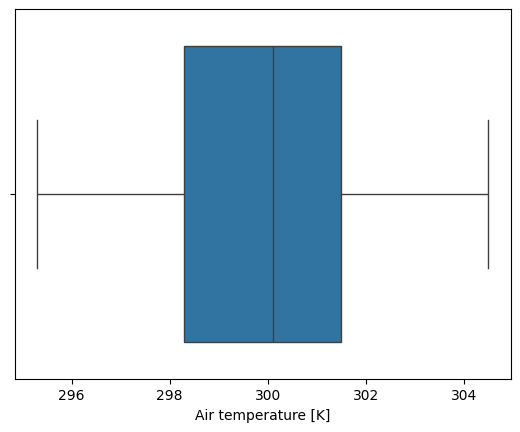

In [13]:
sns.boxplot(x=df['Air temperature [K]'])

Tidak ada outlier pada data Air Temperature

**Mencari outlier pada fitur Process Temperature**

<Axes: xlabel='Process temperature [K]'>

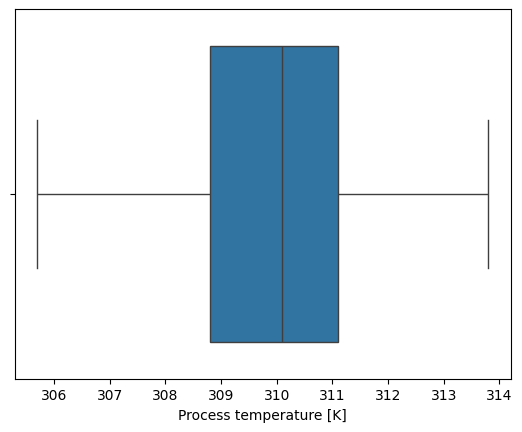

In [14]:
sns.boxplot(x=df['Process temperature [K]'])

Tidak ada outlier pada data Process Temperature

**Mencari outlier pada fitur Rotational Speed**

<Axes: xlabel='Rotational speed [rpm]'>

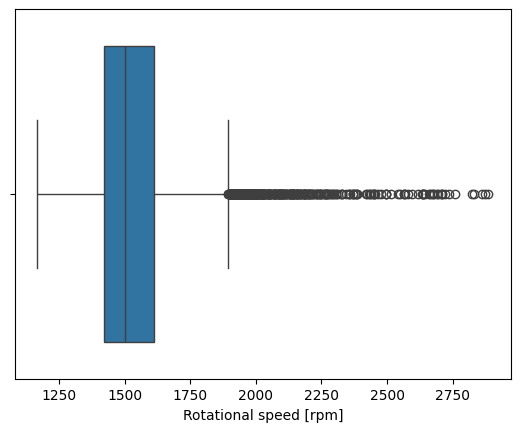

In [15]:
sns.boxplot(x=df['Rotational speed [rpm]'])

Terdapat banyak outlier pada data Rotational Speed. Hal ini mengindikasikan data yang memang salah, atau justru data ini mengindikasikan alat alat yang mengalami kerusakan.

**Mencari outlier pada fitur Torque**

<Axes: xlabel='Torque [Nm]'>

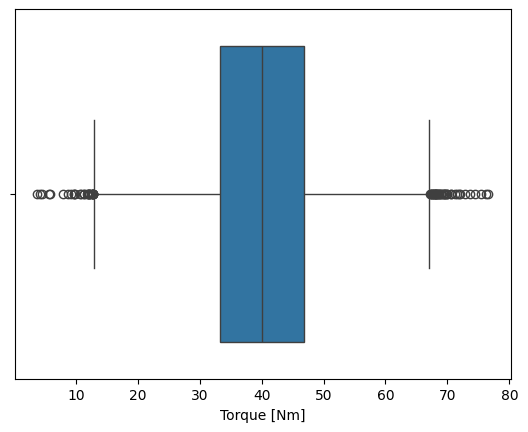

In [16]:
sns.boxplot(x=df['Torque [Nm]'])

Sama hal nya dengan data Rotational Speed, data Torque juga memiliki banyak outlier

**Mencari outlier pada fitur Tool Wear**

<Axes: xlabel='Tool wear [min]'>

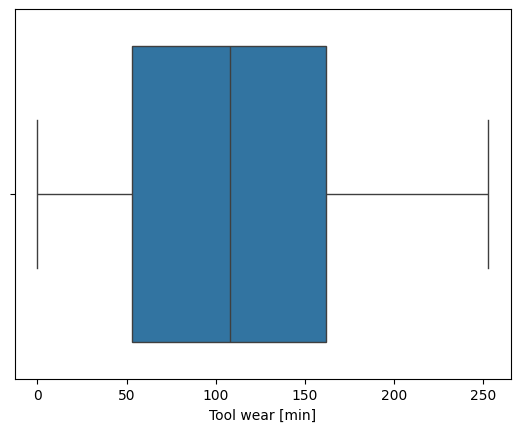

In [17]:
sns.boxplot(x=df['Tool wear [min]'])

Tidak ada outlier pada data Tool Wear

## Univariate Analysis

Tahapan ini merupakan tahapan menganalisa satu persatu fitur kategorikal dan numerikal dalam dataset.

**Analisis Fitur Kategorikal**

Tool Wear Failure

                 Jumlah  Persentase
Machine failure                    
0                  9661        96.6
1                   339         3.4


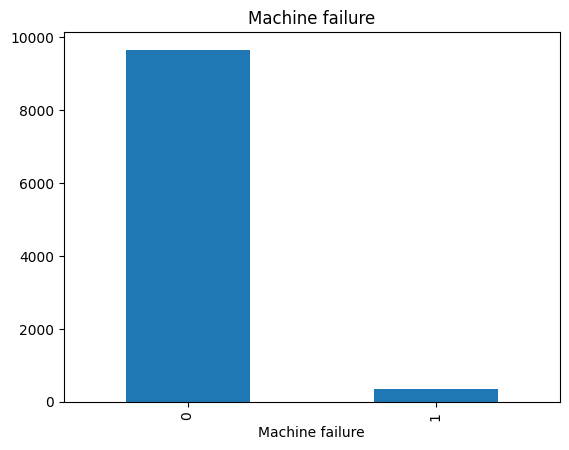

In [18]:
count_fail = df["Machine failure"].value_counts()
percent = 100*df["Machine failure"].value_counts(normalize=True)
count_fail.plot(kind='bar', title="Machine failure")
df_fail = pd.DataFrame({'Jumlah':count_fail, 'Persentase':percent.round(1)})
print(df_fail)

Terdapat 339 data kerusakan mesin dari keseluruhan 10000 data, yang berarti hanya 3.4% nya.

### Multivariate Analysis

Tahapan ini adalah menganalisa dua atau lebih fitur kategorikal dan/atau numerikal sekaligus

**Kerusakan mesin berdasarkan kualitas mesin**

(Kualitas mesin > L = Low, M = Medium, H = High)

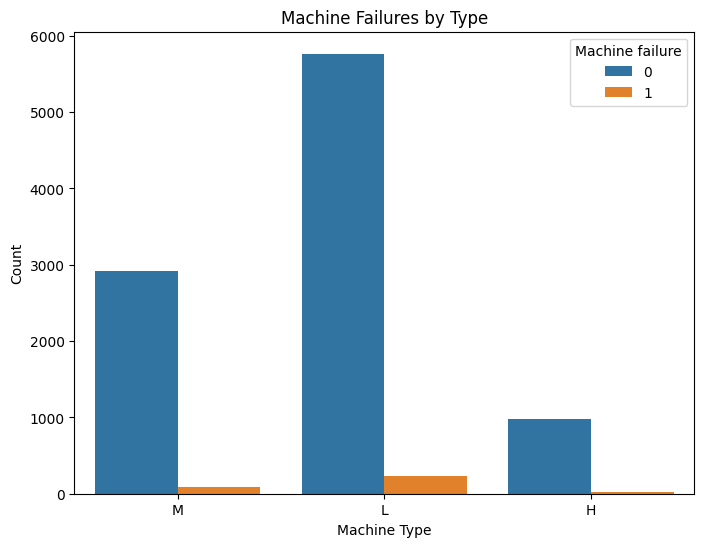

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Type', hue='Machine failure', data=df)
plt.title('Machine Failures by Type')
plt.xlabel('Machine Type')
plt.ylabel('Count')
plt.show()

Paling banyak kerusakan terjadi pada mesin dengan tipe kualitas L (low), terbanyak kedua ada pada tipe M (medium) dan paling sedikit pada tipe H (high)

**Kerusakan mesin terhadap suhu udara**, serta **Distribusi kerusakan mesin terhadap suhu udara berdasarkan tipe mesin**

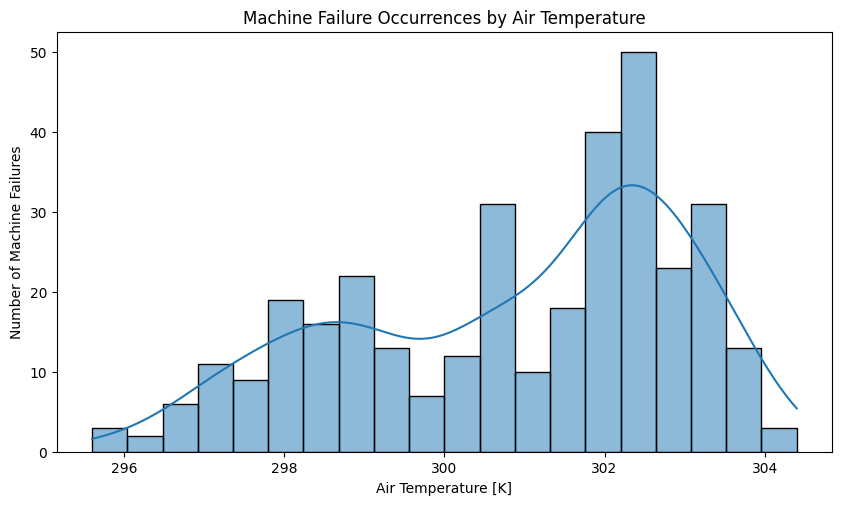

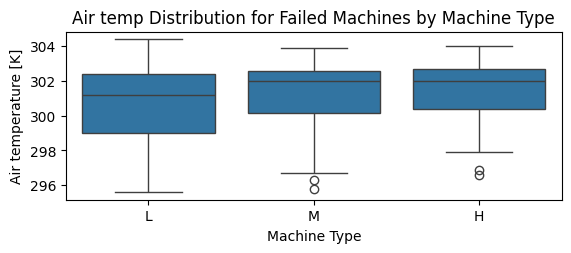

In [20]:
df_failed = df[df['Machine failure'] == 1]

plt.figure(figsize=(10, 12))

plt.subplot(2, 1, 1)
sns.histplot(data=df_failed, x='Air temperature [K]', bins=20, kde=True)
plt.title('Machine Failure Occurrences by Air Temperature')
plt.xlabel('Air Temperature [K]')
plt.ylabel('Number of Machine Failures')
plt.show()

plt.subplot(2, 1, 2)
sns.boxplot(x='Type', y='Air temperature [K]', data=df_failed)
plt.title('Air temp Distribution for Failed Machines by Machine Type')
plt.xlabel('Machine Type')
plt.ylabel('Air temperature [K]')
plt.show()

Terdapat paling banyak kerusakan terjadi pada rentang suhu 300 K hingga sekitar 303 K, serta ada sedikit outlier kerusakan yang terjadi pada suhu di bawah 300 K untuk mesin tipe M dan H

**Kerusakan mesin terhadap suhu proses**, serta **Distribusi kerusakan mesin terhadap suhu proses berdasarkan tipe mesin**

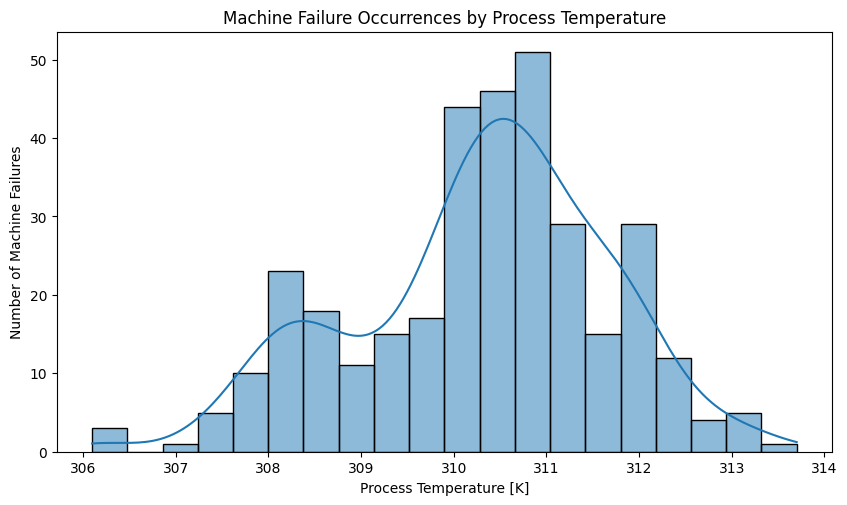

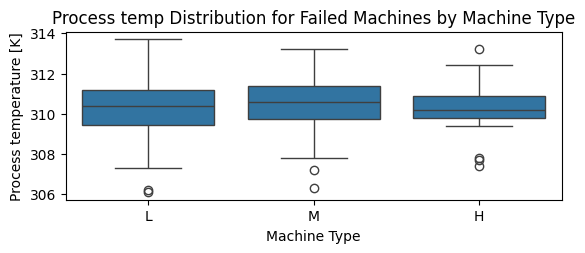

In [21]:
df_failed = df[df['Machine failure'] == 1]

plt.figure(figsize=(10, 12))

plt.subplot(2, 1, 1)
sns.histplot(data=df_failed, x='Process temperature [K]', bins=20, kde=True)
plt.title('Machine Failure Occurrences by Process Temperature')
plt.xlabel('Process Temperature [K]')
plt.ylabel('Number of Machine Failures')
plt.show()

plt.subplot(2, 1, 2)
sns.boxplot(x='Type', y='Process temperature [K]', data=df_failed)
plt.title('Process temp Distribution for Failed Machines by Machine Type')
plt.xlabel('Machine Type')
plt.ylabel('Process temperature [K]')
plt.show()


Terdapat paling banyak kerusakan terjadi pada rentang suhu 309 K hingga sekitar 311 K, serta ada beberapa outlier kerusakan yang terjadi pada suhu di bawah 308 K untuk semua tipe mesin

**Kerusakan mesin terhadap kecepatan rotasi**, serta **Distribusi kerusakan mesin terhadap kecepatan rotasi berdasarkan tipe mesin**

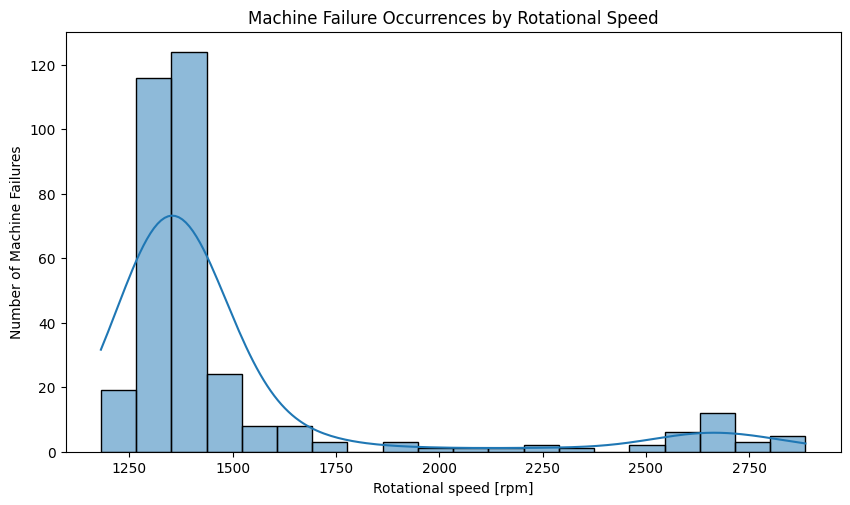

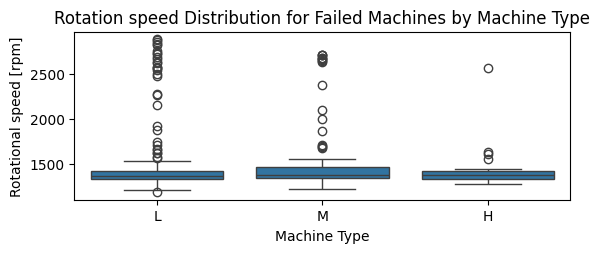

In [22]:
df_failed = df[df['Machine failure'] == 1]

plt.figure(figsize=(10, 12))

plt.subplot(2, 1, 1)
sns.histplot(data=df_failed, x='Rotational speed [rpm]', bins=20, kde=True)
plt.title('Machine Failure Occurrences by Rotational Speed')
plt.xlabel('Rotational speed [rpm]')
plt.ylabel('Number of Machine Failures')
plt.show()

plt.subplot(2, 1, 2)
sns.boxplot(x='Type', y='Rotational speed [rpm]', data=df_failed)
plt.title('Rotation speed Distribution for Failed Machines by Machine Type')
plt.xlabel('Machine Type')
plt.ylabel('Rotational speed [rpm]')
plt.show()

Mayoritas kerusakan terjadi pada rentang kecepatan rotasi 1250 rpm hingga sekitar 1500 rpm, serta ada beanyak outlier kerusakan yang terjadi pada rotasi di atas 1500 rpm pada semua tipe mesin

**Kerusakan mesin terhadap torsi**, serta **Distribusi kerusakan mesin terhadap torsi berdasarkan tipe mesin**

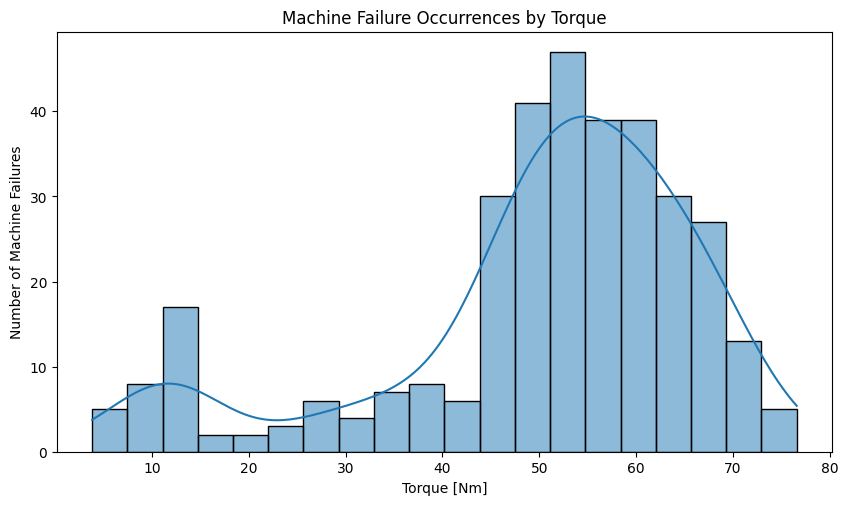

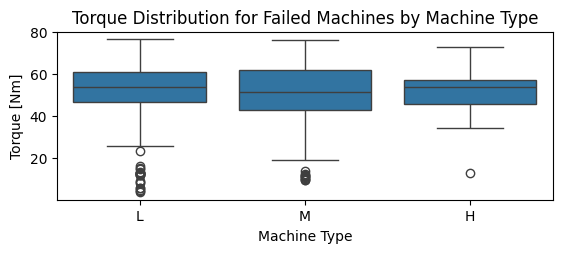

In [23]:
df_failed = df[df['Machine failure'] == 1]

plt.figure(figsize=(10, 12))

plt.subplot(2, 1, 1)
sns.histplot(data=df_failed, x='Torque [Nm]', bins=20, kde=True)
plt.title('Machine Failure Occurrences by Torque')
plt.xlabel('Torque [Nm]')
plt.ylabel('Number of Machine Failures')
plt.show()

plt.subplot(2, 1, 2)
sns.boxplot(x='Type', y='Torque [Nm]', data=df_failed)
plt.title('Torque Distribution for Failed Machines by Machine Type')
plt.xlabel('Machine Type')
plt.ylabel('Torque [Nm]')
plt.show()

Mayoritas kerusakan terjadi pada rentang torsi 40 nm hingga sekitar 70 Nm, serta ada banyak outlier kerusakan yang terjadi pada torsi di bawah 30 Nm pada semua tipe mesin

**Kerusakan mesin terhadap usia pemakaian mesin**, serta **Distribusi kerusakan mesin terhadap usia pemakaian mesin berdasarkan tipe mesin**

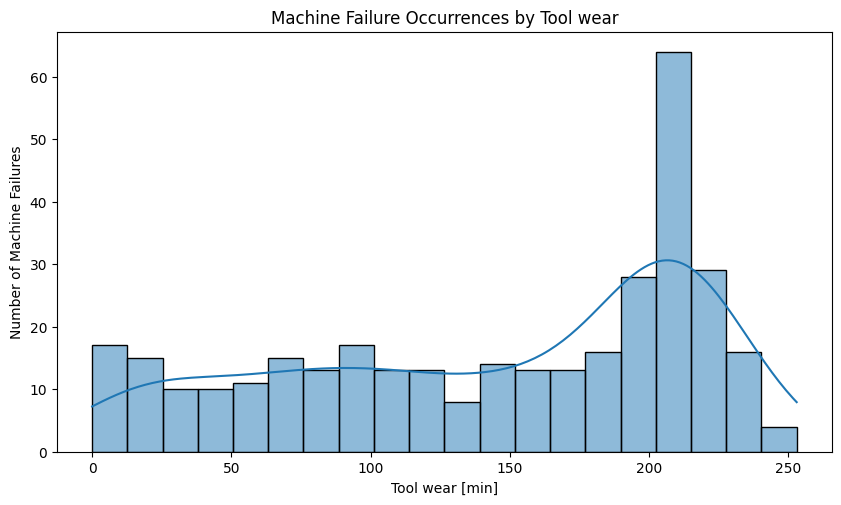

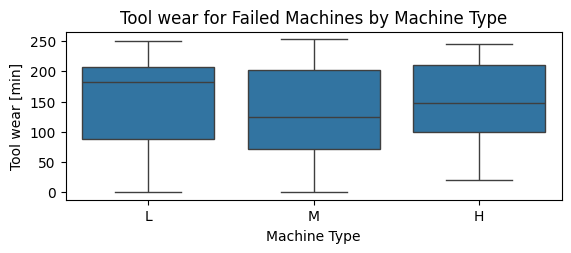

In [24]:
df_failed = df[df['Machine failure'] == 1]

plt.figure(figsize=(10, 12))

plt.subplot(2, 1, 1)
sns.histplot(data=df_failed, x='Tool wear [min]', bins=20, kde=True)
plt.title('Machine Failure Occurrences by Tool wear')
plt.xlabel('Tool wear [min]')
plt.ylabel('Number of Machine Failures')
plt.show()

plt.subplot(2, 1, 2)
sns.boxplot(x='Type', y='Tool wear [min]', data=df_failed)
plt.title('Tool wear for Failed Machines by Machine Type')
plt.xlabel('Machine Type')
plt.ylabel('Tool wear [min]')
plt.show()

Mayoritas kerusakan terjadi pada rentang torsi 40 nm hingga sekitar 70 Nm, serta ada banyak outlier kerusakan yang terjadi pada torsi di bawah 30 Nm pada semua tipe mesin

(Membuat fitur baru yang menampung selisih suhu antara suhu udara dengan suhu proses)

In [25]:
df['Temp Diff [K]'] = df['Process temperature [K]'] - df['Air temperature [K]']
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Temp Diff [K]
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,10.5
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,10.5
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,10.4
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,10.4
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,10.5


**Kerusakan mesin terhadap selisih suhu**, serta **Distribusi kerusakan mesin terhadap selisih suhu berdasarkan tipe mesin**

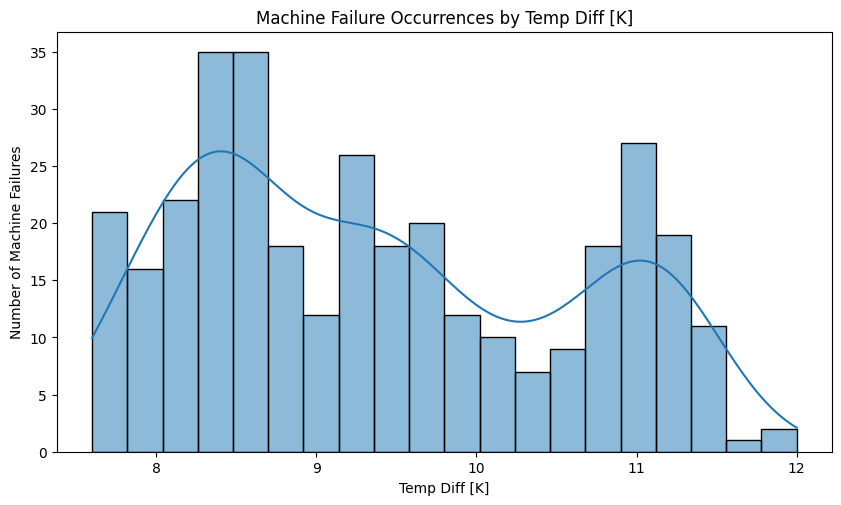

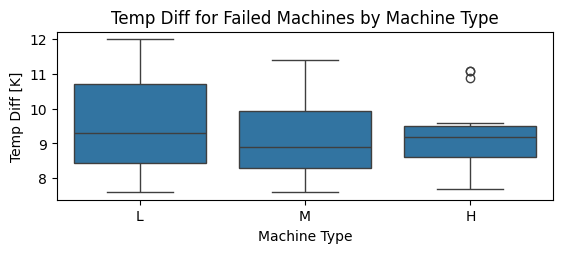

In [26]:
df_failed = df[df['Machine failure'] == 1]

plt.figure(figsize=(10, 12))

plt.subplot(2, 1, 1)
sns.histplot(data=df_failed, x='Temp Diff [K]', bins=20, kde=True)
plt.title('Machine Failure Occurrences by Temp Diff [K]')
plt.xlabel('Temp Diff [K]')
plt.ylabel('Number of Machine Failures')
plt.show()

plt.subplot(2, 1, 2)
sns.boxplot(x='Type', y='Temp Diff [K]', data=df_failed)
plt.title('Temp Diff for Failed Machines by Machine Type')
plt.xlabel('Machine Type')
plt.ylabel('Temp Diff [K]')
plt.show()

Mayoritas kerusakan terjadi pada rentang selisih suhu 8 K hingga sekitar 9 K

## Data Preparation

Hapus dahulu kolom yang tidak akan digunakan. Kolom yang tidak akan digunakan adalah `UDI`, `Product ID`, serta segala jenis spesifik kerusakan mesin, dari `TWF` hingga `RNF`, karena kita akan terfokus ke kerusakan mesin keseluruhan.

In [27]:
del_columns = ["UDI", "Product ID", "TWF", "HDF", "PWF", "OSF", "RNF"]
df = df.drop(columns=del_columns)
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Temp Diff [K]
0,M,298.1,308.6,1551,42.8,0,0,10.5
1,L,298.2,308.7,1408,46.3,3,0,10.5
2,L,298.1,308.5,1498,49.4,5,0,10.4
3,L,298.2,308.6,1433,39.5,7,0,10.4
4,L,298.2,308.7,1408,40.0,9,0,10.5


Label Encoding `Type` agar bisa dilihat korelasinya

In [28]:
le = LabelEncoder()
df['Type'] = le.fit_transform(df['Type'])
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Temp Diff [K]
0,2,298.1,308.6,1551,42.8,0,0,10.5
1,1,298.2,308.7,1408,46.3,3,0,10.5
2,1,298.1,308.5,1498,49.4,5,0,10.4
3,1,298.2,308.6,1433,39.5,7,0,10.4
4,1,298.2,308.7,1408,40.0,9,0,10.5


In [29]:
df.describe()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Temp Diff [K]
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.19940,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,10.000630
std,0.60023,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,1.001094
min,0.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,7.600000
25%,1.00000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,9.300000
50%,1.00000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,9.800000
75%,2.00000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,11.000000
max,2.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,12.100000


Periksa korelasi antar fitur dalam dataset

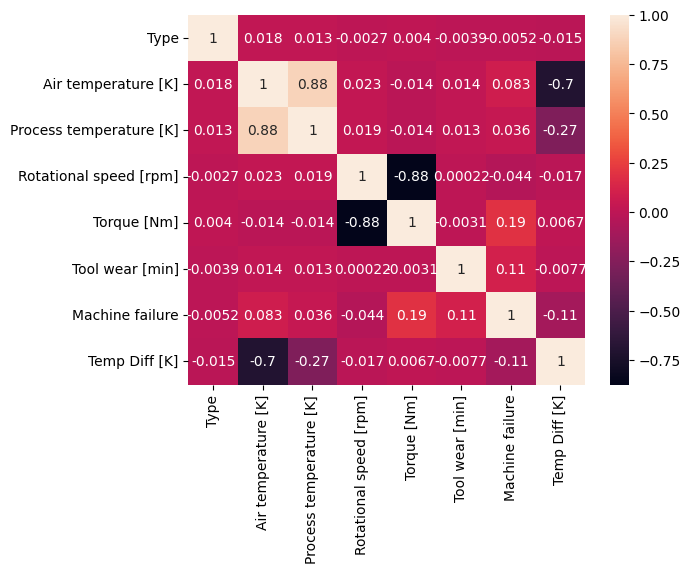

In [30]:
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

Ditemukan korelasi tertinggi dengan `Machine failure` ada dengan data `Torque [Nm]`, `Tool wear [min]`, serta `Temp Diff [K]`

Standarisasi fitur yang memiliki standar deviasi tinggi yaitu `Rotational speed [rpm]`, dan `Tool wear [min]`

In [31]:
std = StandardScaler()
df[['Rotational speed [rpm]', 'Tool wear [min]']] = std.fit_transform(df[['Rotational speed [rpm]', 'Tool wear [min]']])
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Temp Diff [K]
0,2,298.1,308.6,0.068185,42.8,-1.695984,0,10.5
1,1,298.2,308.7,-0.729472,46.3,-1.648852,0,10.5
2,1,298.1,308.5,-0.227450,49.4,-1.617430,0,10.4
3,1,298.2,308.6,-0.590021,39.5,-1.586009,0,10.4
4,1,298.2,308.7,-0.729472,40.0,-1.554588,0,10.5


Train Test Split

Data dipecah menjadi data pelatihan model (80% dari keseluruhan) dan data pengujian model (20% dari keseluruhan). Fitur yang akan digunakan utamanya untuk menghasilkan prediksi adalah data yang berkorelasi paling tinggi dengan kerusakan mesin milling, yaitu `Torque [Nm]`, `Tool wear [min]`, serta `Temp Diff [K]`.

In [32]:
df.columns = df.columns.str.replace('[\[\]<>]', '', regex=True).str.replace(' ', '_')

X = df[['Temp_Diff_K', 'Torque_Nm', 'Tool_wear_min']]
y = df['Machine_failure']
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.20, random_state=42)

In [33]:
print(X_train.shape)
print(X_test.shape)

(8000, 3)
(2000, 3)


## Modelling

**XGBoost Classifier**

XGBoost Classifier merupakan salah satu algoritma yang terbaru dalam dunia machine learning, berbasis gradien ekstrim. Keunggulan XGBoost mencakup akurasi tinggi, skalabilitas, dan fleksibilitas, serta regularisasi bawaan XGBoost membantu mencegah overfitting dan meningkatkan generalisasi.

Parameter XGBoost yang akan digunakan adalah:
- **booster**: booster yang digunakan oleh XGBoost (sesuai namanya dalam algoritmanya, Boost). Defaultnya adalah 'gbtree', yang menggunakan booster berbasis pohon.
- **tree_method**: struktur pohon yang digunakan oleh booster, khusus booster tipe pohon. Jenis 'exact' menggunakan algoritma tipe serakah (greedy), yang mengenumerasikan semua kandidat.

In [37]:
xgb = XGBClassifier(booster = 'gbtree', tree_method = 'exact')
xgb.fit(X_train, y_train)
xgb_train_acc = accuracy_score(y_train, xgb.predict(X_train))
print(f"Akurasi Pelatihan Model XGBoost Classifier = {xgb_train_acc}")

Akurasi Pelatihan Model XGBoost Classifier = 0.997


Didapatkan akurasi dengan data latih sebesar 99.7%, sangat baik. Selanjutnya, uji coba dengan data uji.

Akurasi Tes Model XGBoost Classifier = 0.976


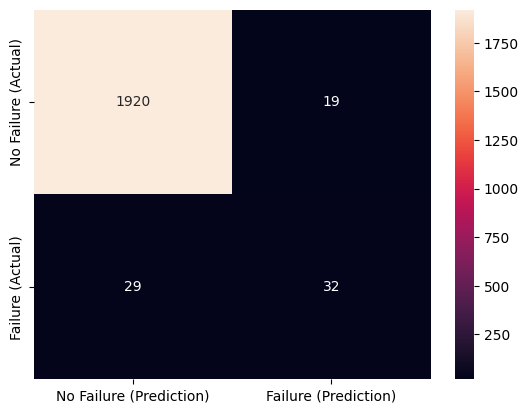

In [38]:
xgb_y_pred = xgb.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_y_pred)
print (f"Akurasi Tes Model XGBoost Classifier = {xgb_acc}")

class_labels = ['No Failure (Actual)', 'Failure (Actual)']
pred_labels = ['No Failure (Prediction)', 'Failure (Prediction)']
xgb_cm = confusion_matrix(y_test, xgb_y_pred)
sns.heatmap(xgb_cm, annot=True, fmt='d', xticklabels=pred_labels, yticklabels=class_labels)
plt.show()

Saat dievaluasi terhadap data uji, akurasinya turun menjadi 97.6%, tidak terlalu signifikan.

**Random Forest Classifier**

Random Forest Classifier layak dicoba karena merupakan salah satu algoritma berbasis Ensemble Learning yang umum digunakan sejak dahulu. Keunggulan Random Forest mencakup kinerja yang baik dalam berbagai jenis masalah klasifikasi, kemampuan bawaan untuk mengurangi overfitting.

Parameter Random Forest Classifier yang digunakan adalah:
- **n_estimators**: Jumlah pohon dalam forest. (Nilai Default = 100)
- **max_depth**: Kedalaman atau panjang pohon. Ini merupakan ukuran seberapa banyak pohon dapat membelah (splitting) untuk membagi setiap node ke dalam jumlah pengamatan yang diinginkan.
- **random_state**: Digunakan untuk mengontrol random number generator yang digunakan.

In [39]:
rf = RandomForestClassifier(n_estimators=50, max_depth=18, random_state=42)
rf.fit(X_train, y_train)
rf_train_acc = accuracy_score(y_train, rf.predict(X_train))
print(f"Akurasi Pelatihan Model Random Forest Classifier = {rf_train_acc}")

Akurasi Pelatihan Model Random Forest Classifier = 0.99975


Didapatkan akurasi dengan data latih sebesar 99.9%, hampir sempurna. Selanjutnya, uji coba dengan data uji.

Akurasi Tes model Random Forest Classfier = 0.98


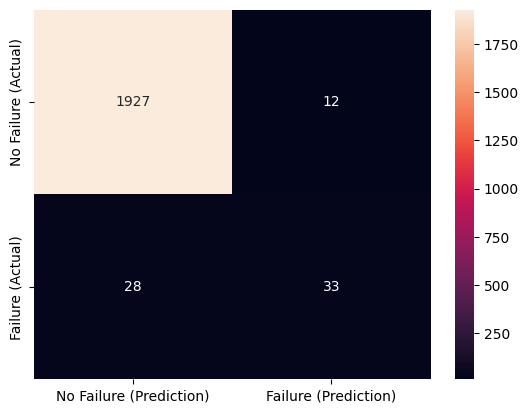

In [40]:
rf_y_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_y_pred)
print (f"Akurasi Tes model Random Forest Classfier = {rf_acc}")

class_labels = ['No Failure (Actual)', 'Failure (Actual)']
pred_labels = ['No Failure (Prediction)', 'Failure (Prediction)']
rf_cm = confusion_matrix(y_test, rf_y_pred)
sns.heatmap(rf_cm, annot=True, fmt='d', xticklabels=pred_labels, yticklabels=class_labels)
plt.show()

Saat dievaluasi terhadap data uji, akurasinya turun menjadi 98%, tidak terlalu signifikan.

**Multi Layer Perceptron Classifier**

MLP Classsifier adalaha algoritma klasifikasi berbasis neural network (perceptron). Keunggulan MLP Classifier mencakup keunggulan dalam pemodelan hubungan non-linier, mempelajari fitur secara otomatis, dan menangani kumpulan data besar dengan skalabilitas.

Parameter yang digunakan dalam MLP Classifier mencakup:
- **activation**: fungsi aktivasi dari neuron. Defaultnya adalah 'relu', tapi karena proyek klasifikasi ini hanya mencakup klasifikasi biner, maka digunakan aktivasi 'logistic'.
- **solver**: solver untuk optimisasi neuron. Defaultnya adalah 'adam'
- **max_iter**: membatasi iterasi yang dilaksanakan oleh solver.

In [41]:
mlp = MLPClassifier(activation='logistic', solver='adam', max_iter = 300)
mlp.fit(X_train, y_train)
mlp_train_acc = accuracy_score(y_train, mlp.predict(X_train))
print(f"Akurasi Pelatihan Model Multi Layer Perceptron Classifier = {mlp_train_acc}")

Akurasi Pelatihan Model Multi Layer Perceptron Classifier = 0.97225


Didapatkan akurasi dengan data latih sebesar 97.2%, sangat baik meski tak sebaik 2 algoritma sebelumnya. Selanjutnya, uji coba dengan data uji.

Akurasi model Multi Layer Perceptron Classifier = 0.972


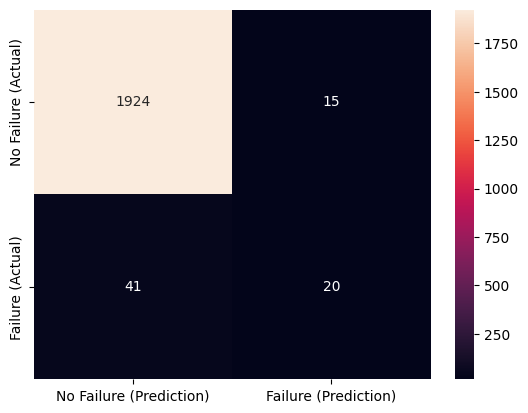

In [42]:
mlp_y_pred = mlp.predict(X_test)
mlp_acc = accuracy_score(y_test, mlp_y_pred)
print (f"Akurasi model Multi Layer Perceptron Classifier = {mlp_acc}")

class_labels = ['No Failure (Actual)', 'Failure (Actual)']
pred_labels = ['No Failure (Prediction)', 'Failure (Prediction)']
mlp_cm = confusion_matrix(y_test, mlp_y_pred)
sns.heatmap(mlp_cm, annot=True, fmt='d', xticklabels=pred_labels, yticklabels=class_labels)
plt.show()

Saat dievaluasi terhadap data uji, akurasinya konsisten di angka 97.2%.

## Kesimpulan

Berikut adalah hasil pengujian model prediksi menggunakan XGBoost, Random Forest, dan Multi Layer Perceptron, masing-masing 1 kali percobaan.

In [43]:
models = pd.DataFrame({
    'Model':
    ['XGBoost Classifier', 'Random Forest Classifier', 'Multi Layer Perceptron Classifier'],
    'Train Accuracy' :
    [xgb_train_acc, rf_train_acc, mlp_train_acc],
    'Test Accuracy' :
    [xgb_acc, rf_acc, mlp_acc]
})
models

,Model,Train Accuracy,Test Accuracy
0,XGBoost Classifier,0.99700,0.976
1,Random Forest Classifier,0.99975,0.980
2,Multi Layer Perceptron Classifier,0.97225,0.972


Dari hasil di atas, dapat ditarik kesimpulan:

1. Random Forest bekerja paling baik dengan data latih (99.9% akurasi) dan data uji (98% akurasi)
2. XGBoost bekerja sangat baik dengan data latih (99.7% akurasi), meskipun kalah tipis baiknya dari Random Forest (97.6% akurasi)
3. Multi Layer Perceptron bekerja paling konsisten, dengan akurasi yang persis dengan data latih dan data uji (keduanya di 97.2% akurasi)

Dari hasil di atas, bisa disimpulkan bahwa Random Forest layak digunakan untuk diimplementasikan dalam memprediksi kerusakan mesin milling, karena akurasinya yang tinggi. Metode ini layak untuk diimplementasikan ke lapangan karena mampu membantu mencegah kerusakan mesin milling yang berpotensi berdampak kepada laju produksi barang, atau berdampak kepada kemajuan kualitas alat potong mesin milling di masa depan.